In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet  

In [358]:
# Game Stock
initial_df=pd.read_csv("GME_stock.csv")

In [359]:
initial_df


,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [360]:
# corelation
initial_df.corr()

,open_price,high_price,low_price,close_price,volume,adjclose_price
open_price,1.000000,0.979230,0.983531,0.994380,0.159918,0.973626
high_price,0.979230,1.000000,0.933568,0.964880,0.240094,0.964430
low_price,0.983531,0.933568,1.000000,0.989899,0.106601,0.945227
close_price,0.994380,0.964880,0.989899,1.000000,0.181149,0.976725
volume,0.159918,0.240094,0.106601,0.181149,1.000000,0.271683
adjclose_price,0.973626,0.964430,0.945227,0.976725,0.271683,1.000000


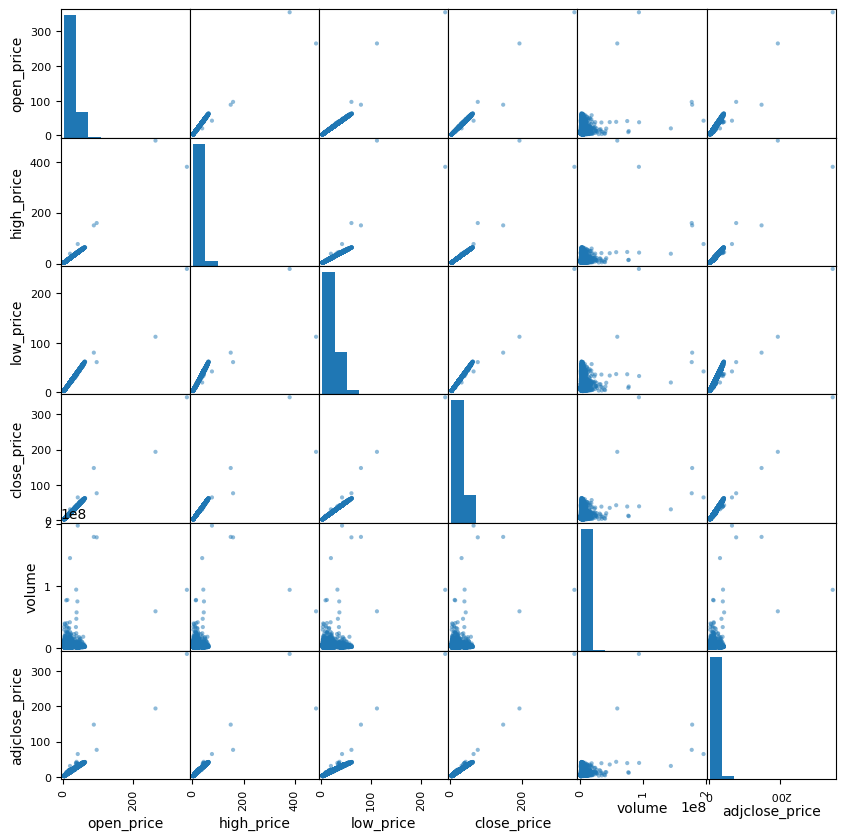

In [361]:
#
# create a scatter plot
# plt.scatter(initial_df['open_price'],initial_df['open_price'])
# plt.xlabel('geography')
# plt.ylabel('average_price')
# plt.title('geography vs average_price')

# create a scatter matrix
pd.plotting.scatter_matrix(initial_df, figsize=(10, 10), diagonal='hist')
plt.xticks(rotation=180)
plt.show()

In [452]:
# for col in initial_df.columns:
#     plt.bar(initial_df.date, initial_df[col], label=col)

# # add legend, x- and y-axis labels, and a title
# plt.legend()
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Bar Plot of All Columns')

# plt.show()

In [453]:
model= Prophet()

In [454]:
initial_df.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [455]:
initial_df['date'] = pd.to_datetime(initial_df['date'])

In [456]:
initial_df['date']=pd.to_datetime(initial_df['date'], format = '%Y/%d/%m %I:%M:%S %p')

In [457]:
df=initial_df.drop(['volume'], axis=1)

In [458]:
# rename for fbprophet
df=initial_df.rename(columns={'date':'ds','adjclose_price':'y'})
# df_ds_y=df.drop(columns=['open_price','high_price','low_price','close_price'])
df.info()
# df_ds_y.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           4773 non-null   datetime64[ns]
 1   open_price   4773 non-null   float64       
 2   high_price   4773 non-null   float64       
 3   low_price    4773 non-null   float64       
 4   close_price  4773 non-null   float64       
 5   volume       4773 non-null   float64       
 6   y            4773 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 261.1 KB


In [470]:
# Create a Prophet model and fit it to the data
model = Prophet()


In [471]:
# model.add_regressor('volume')
model.add_regressor('high_price')
model.add_regressor('low_price')
model.add_regressor('close_price')
model.add_regressor('open_price')

model.fit(df)
df

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds,open_price,high_price,low_price,close_price,volume,y
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...,...
4768,2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [499]:
future=model.make_future_dataframe(periods=365)
# # Create future DataFrame
# future_dates = pd.date_range(start='2022-01-01', periods=365, freq='D')
# future = pd.DataFrame({'ds': future_dates})

In [500]:
# n_samples=365
# high_price = np.empty((n_samples, len(df['high_price'])))
# low_price  = np.empty((n_samples, len(df['low_price'])))
# close_price = np.empty((n_samples, len(df['close_price'])))
# open_price  = np.empty((n_samples, len(df['open_price'])))

# Generate the bootstrap samples
   
high_price = np.random.normal(loc=df['high_price'].mean(), scale=df['high_price'].std(), size=365)
low_price = np.random.normal(loc=df['low_price'].mean(), scale=df['low_price'].std(), size=365)
close_price = np.random.normal(loc=df['close_price'].mean(), scale=df['close_price'].std(), size=365)
open_price = np.random.normal(loc=df['open_price'].mean(), scale=df['open_price'].std(), size=365)


In [501]:
# high_price.shape
# my_scalar = high_price[0]

In [502]:
future
future['high_price']=df['high_price']
future['low_price']=df['low_price']
future['close_price']=df['close_price']
future['open_price']=df['open_price']
# future['volume']=df['volume']
# future=future['high_price'].fillna(high_price)
# x=pd.Series(high_price)


In [517]:
# Replace missing values in "high_price" column with values from "x" array
missing_indices = future['high_price'].index[future['high_price'].isna()]
future.loc[missing_indices, 'high_price'] = np.random.choice(high_price, size=len(missing_indices))

missing_indices = future['low_price'].index[future['low_price'].isna()]
future.loc[missing_indices, 'low_price'] = np.random.choice(low_price, size=len(missing_indices))

missing_indices = future['close_price'].index[future['close_price'].isna()]
future.loc[missing_indices, 'close_price'] = np.random.choice(close_price, size=len(missing_indices))

missing_indices = future['open_price'].index[future['open_price'].isna()]
future.loc[missing_indices, 'open_price'] = np.random.choice(open_price, size=len(missing_indices))

    


In [507]:
missing_indices

Int64Index([], dtype='int64')

In [508]:
# x=pd.Series(high_price)
# future['high_price'].fillna(value=0, inplace=True)
# future['high_price'].fillna(value=x, inplace=True)
# future.isna().sum()

In [515]:
future.tail()

,ds,high_price,low_price,close_price,open_price
5133,2022-01-24,5.128949,25.273103,52.273606,NaN
5134,2022-01-25,7.237402,27.208739,35.394839,NaN
5135,2022-01-26,45.704717,31.044893,10.899733,NaN
5136,2022-01-27,40.905008,26.340454,11.465090,NaN
5137,2022-01-28,31.219633,44.502280,29.734033,NaN


In [518]:
future
# high_price.info()

,ds,high_price,low_price,close_price,open_price
0,2002-02-13,483.000000,112.250000,193.600006,265.000000
1,2002-02-14,380.000000,249.000000,347.510010,354.829987
2,2002-02-15,150.000000,80.199997,147.979996,88.559998
3,2002-02-19,159.179993,61.130001,76.790001,96.730003
4,2002-02-20,76.760002,42.320000,65.010002,42.590000
...,...,...,...,...,...
5133,2022-01-24,5.128949,25.273103,52.273606,9.429298
5134,2022-01-25,7.237402,27.208739,35.394839,7.225002
5135,2022-01-26,45.704717,31.044893,10.899733,12.729169
5136,2022-01-27,40.905008,26.340454,11.465090,40.049088


In [519]:
predict = model.predict(future)

In [433]:
future.isnull().sum()

ds               0
high_price       0
low_price      365
close_price    365
open_price     365
volume         365
dtype: int64

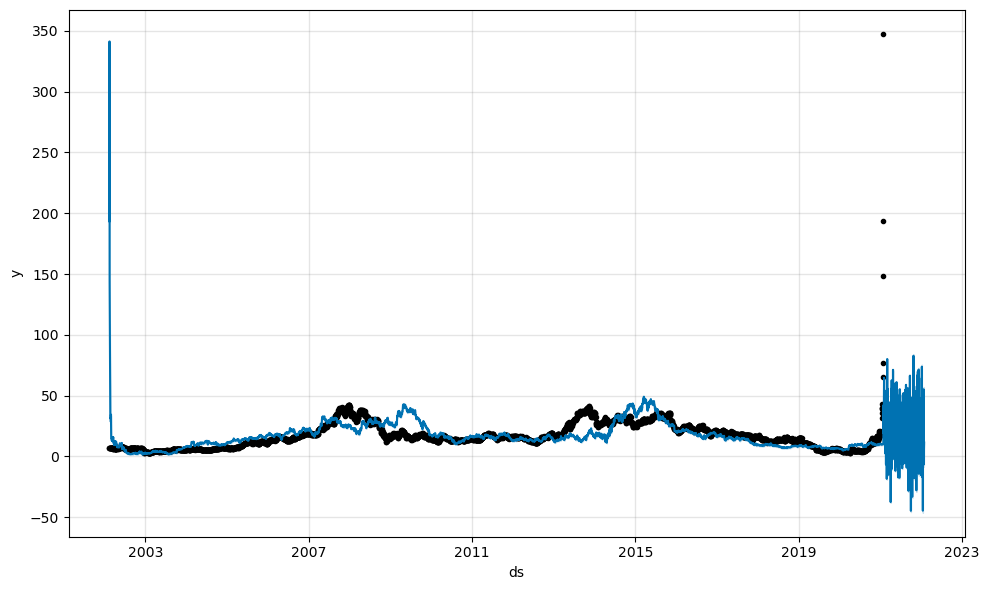

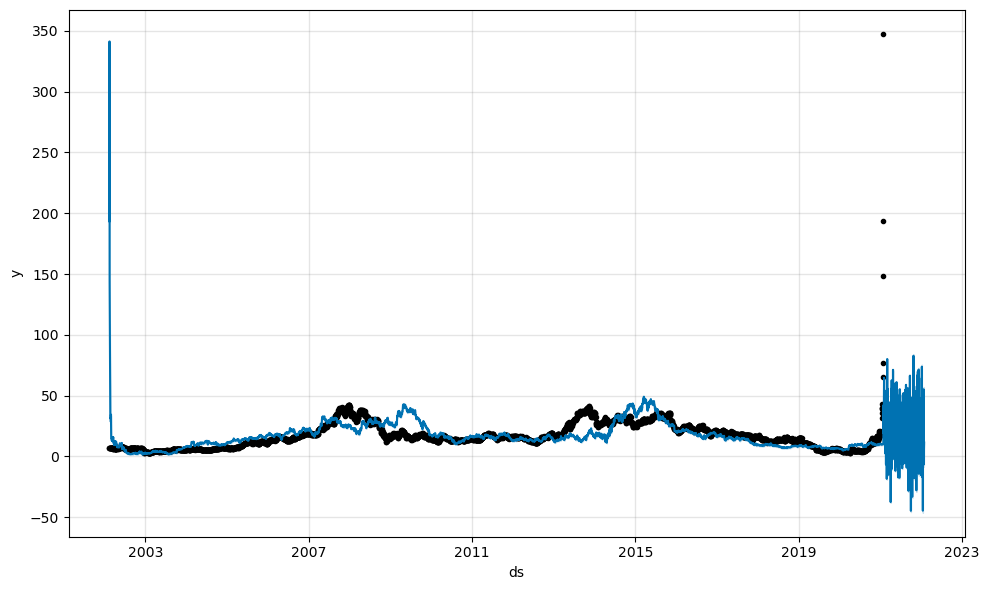

In [520]:
model.plot(predict)

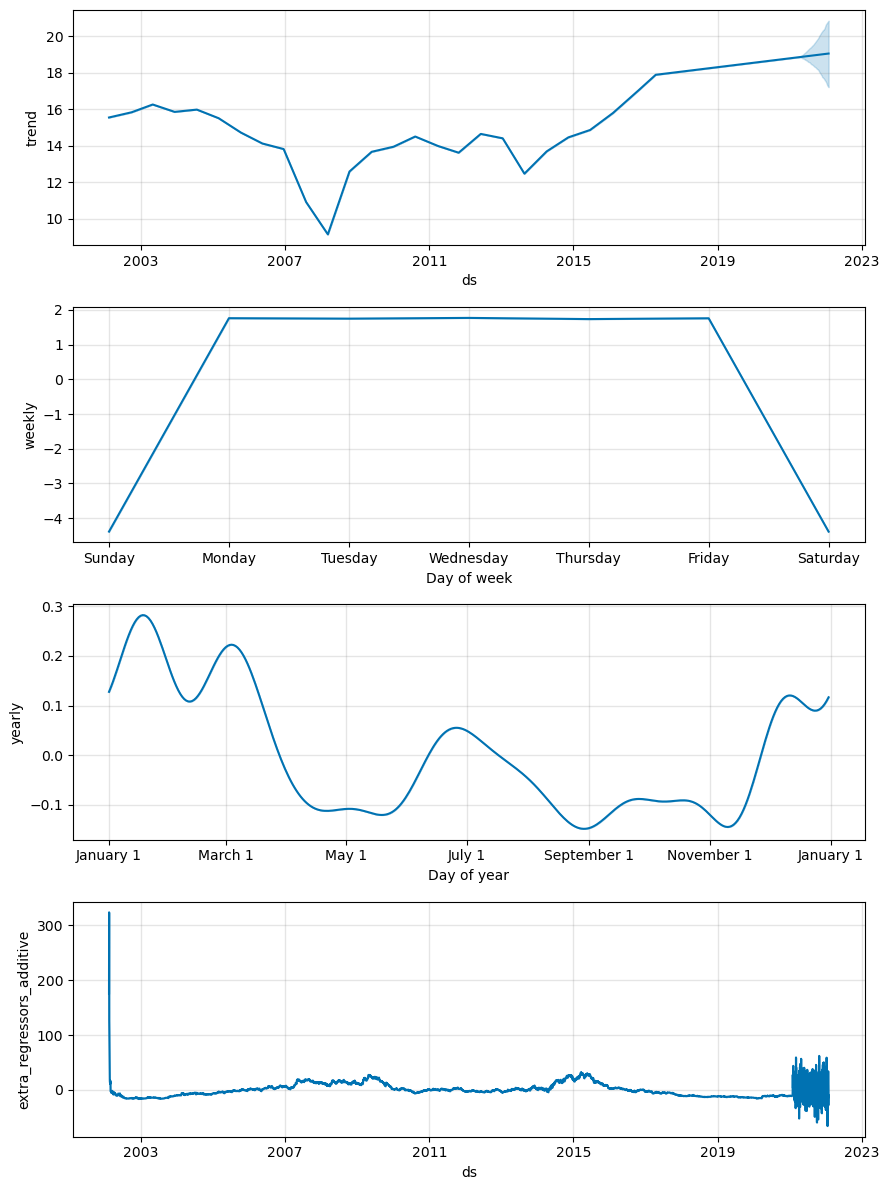

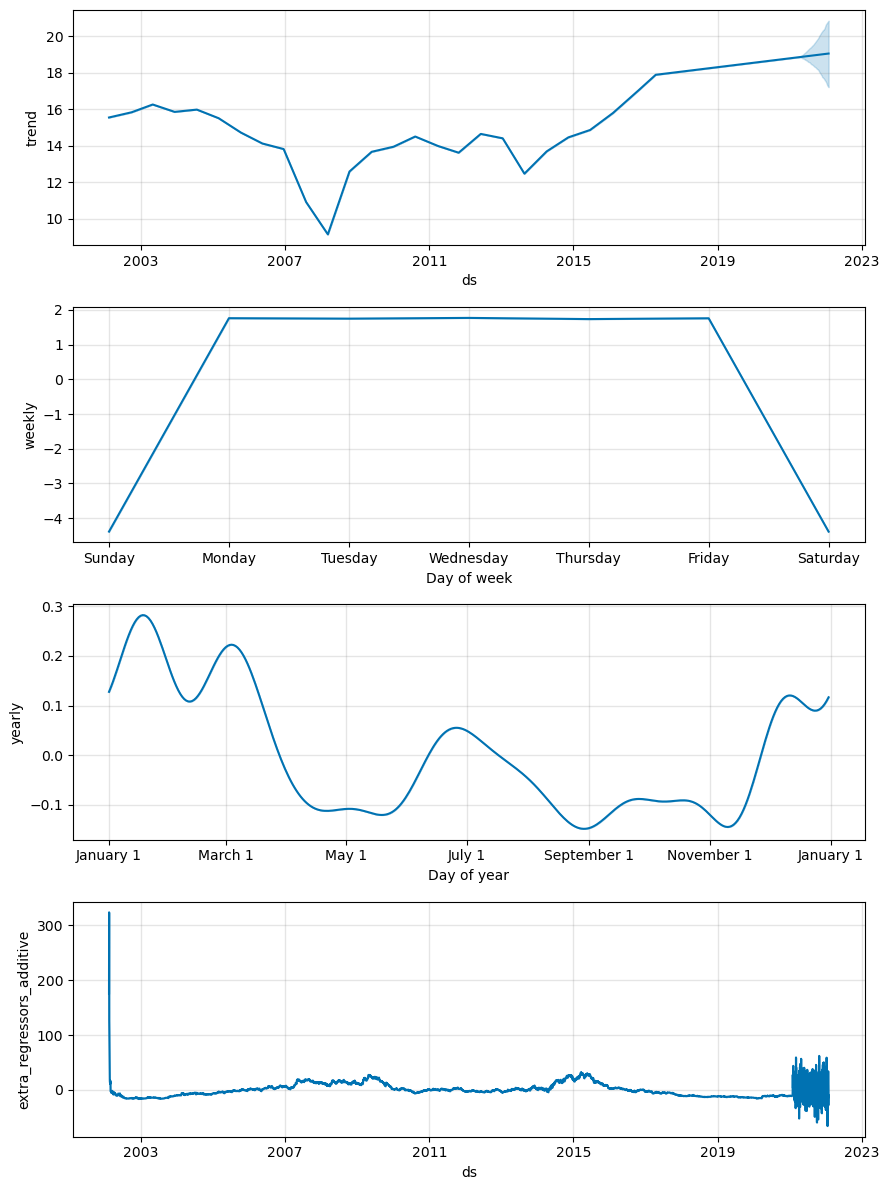

In [521]:
model.plot_components(predict)

In [236]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor

# # X is the matrix of features, y is the target variable
# estimator = RandomForestRegressor(n_estimators=10, random_state=42)
# selector = RFE(estimator, n_features_to_select=3, step=1)
# X=initial_df.drop('adjclose_price' ,axis=1)

# selector.fit(X, initial_df['adjclose_price'])

# The selected features are stored in the support_ attribute
# selected_features = X.columns[selector.support_]


# Tesla

In [534]:
data = pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668,107820000
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666,96778500
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334,73786500
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999,69273000
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000,122391000


In [530]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999591,0.999402,0.998818,0.998818,-0.316443
High,0.999591,1.000000,0.999402,0.999461,0.999461,-0.310682
Low,0.999402,0.999402,1.000000,0.999514,0.999514,-0.322519
Close,0.998818,0.999461,0.999514,1.000000,1.000000,-0.315415
Adj Close,0.998818,0.999461,0.999514,1.000000,1.000000,-0.315415
Volume,-0.316443,-0.310682,-0.322519,-0.315415,-0.315415,1.000000


In [537]:
data['Date'] = pd.DatetimeIndex(data['Date'])

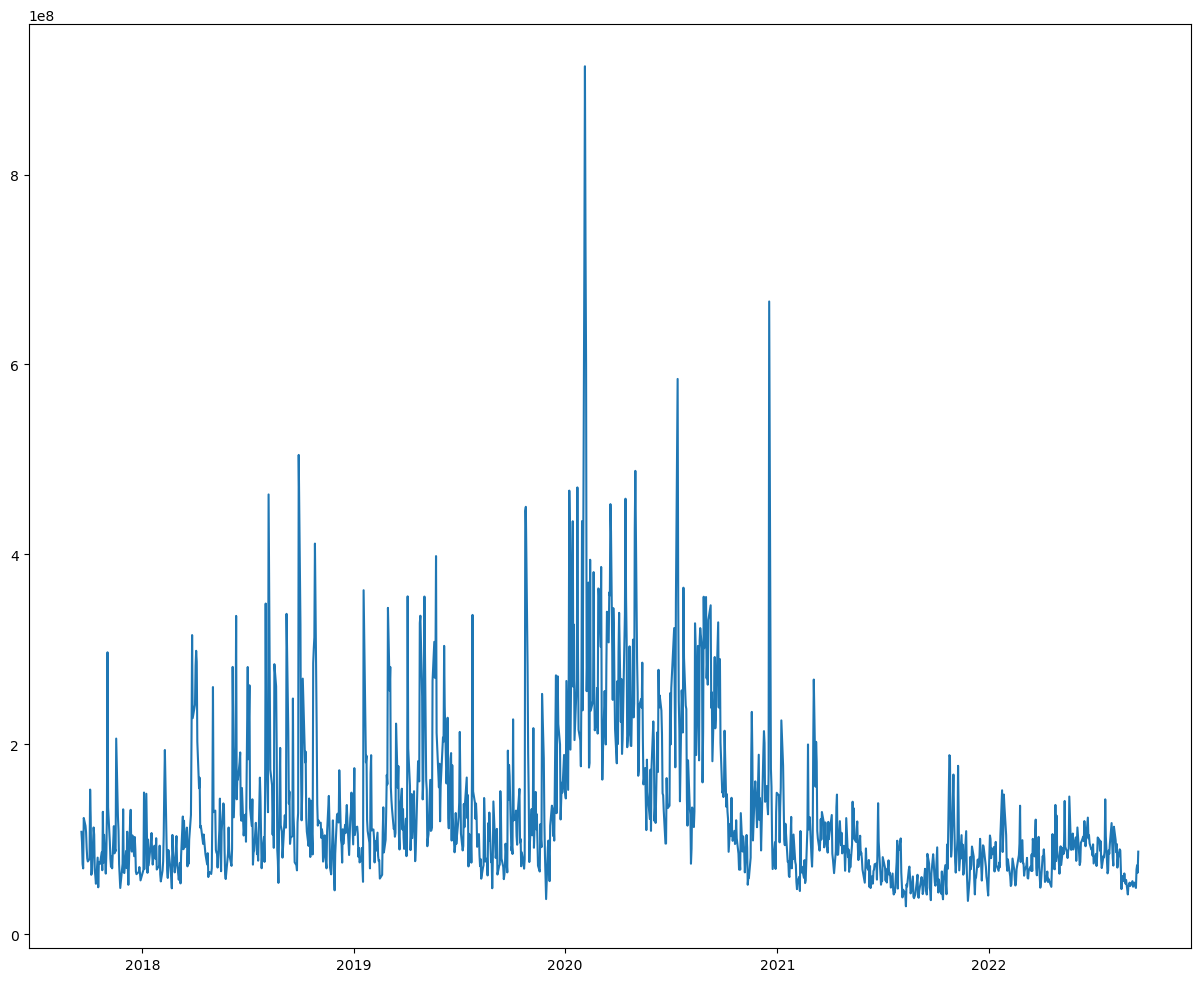

In [538]:
plt.figure(figsize=(15, 12))
plt.plot(data['Date'], data['Volume'])

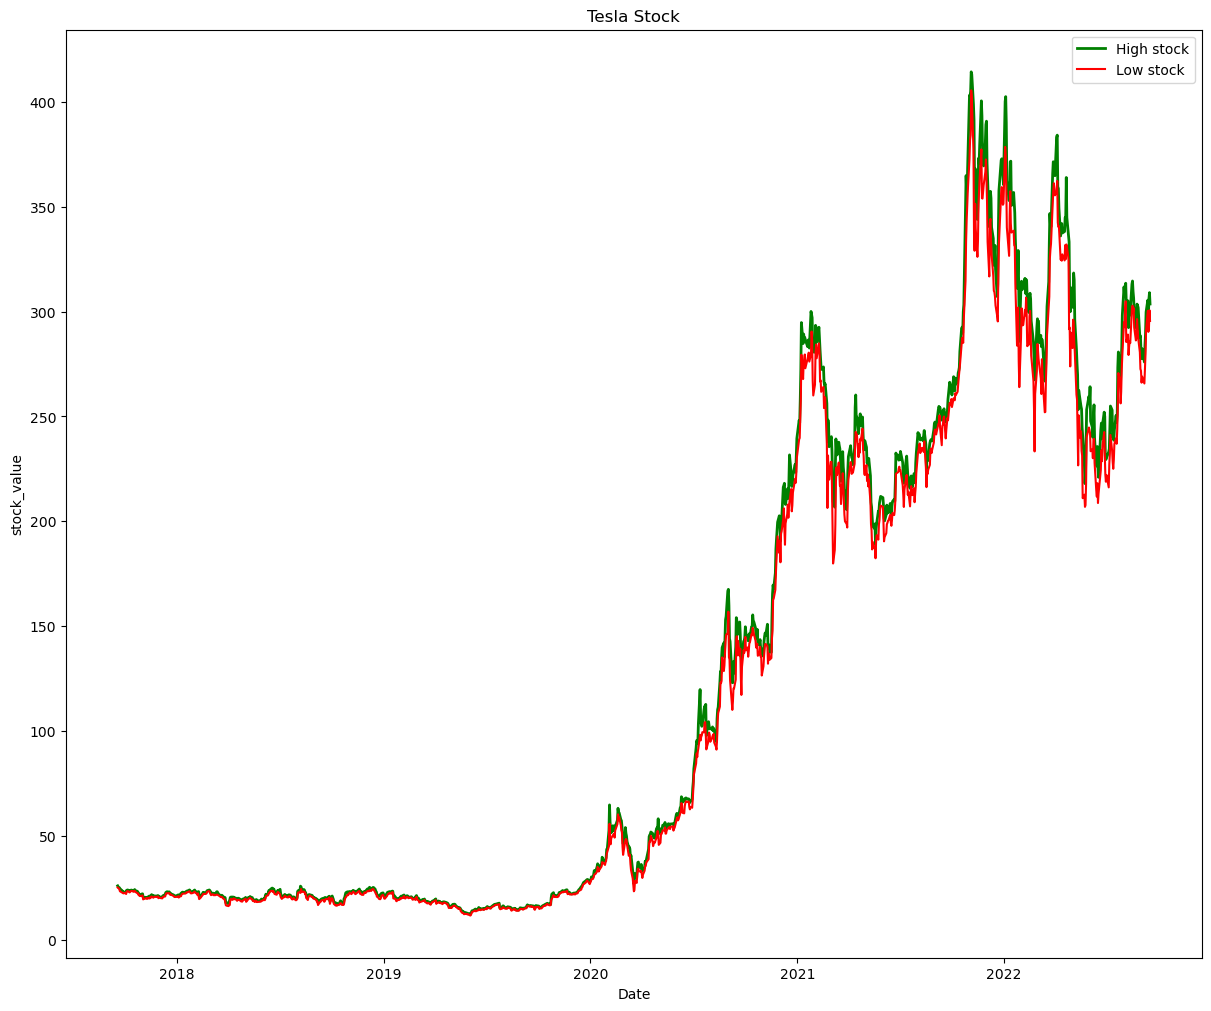

In [540]:
plt.figure(figsize=(12, 10), constrained_layout=True)
c = ['green', 'red']
y = ['High', 'Low']
l = 2.0
for j, c in zip(y, c):
  plt.plot(data['Date'], data[j], color=c, linewidth=l, label=f'{j} stock')
  plt.title('Tesla Stock')
  plt.xlabel('Date')
  plt.ylabel('stock_value')
  plt.legend()
  l -=0.5

plt.show()


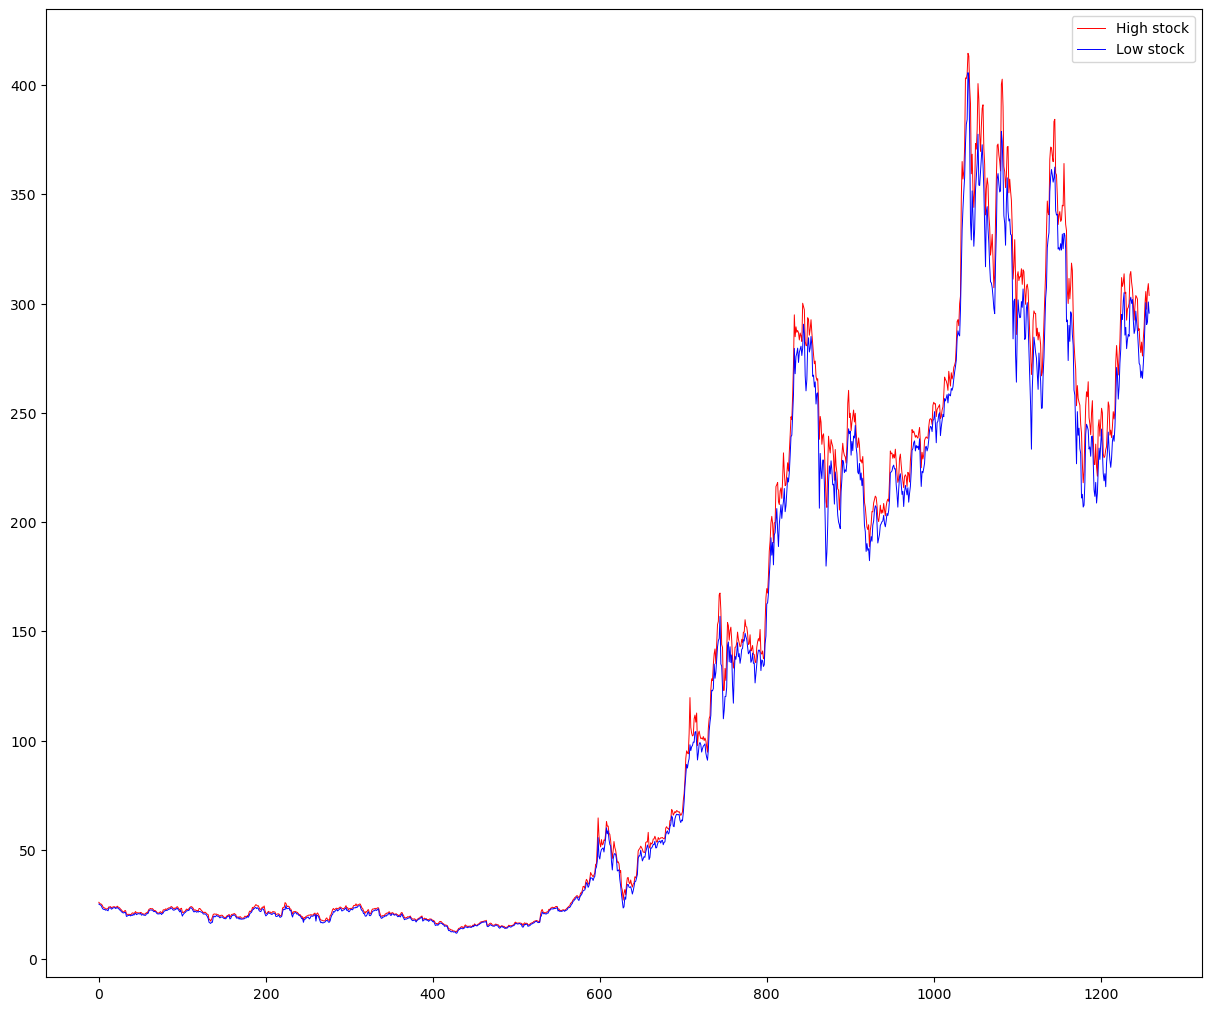

In [578]:
color =['red','blue']
stock=["High","Low",]
plt.figure(figsize=(12, 10), constrained_layout=True)
for i, j in zip(color,stock):
    plt.plot(data[j], color=i , label=f'{j} stock',linewidth=0.7)
    plt.legend()   
plt.show()

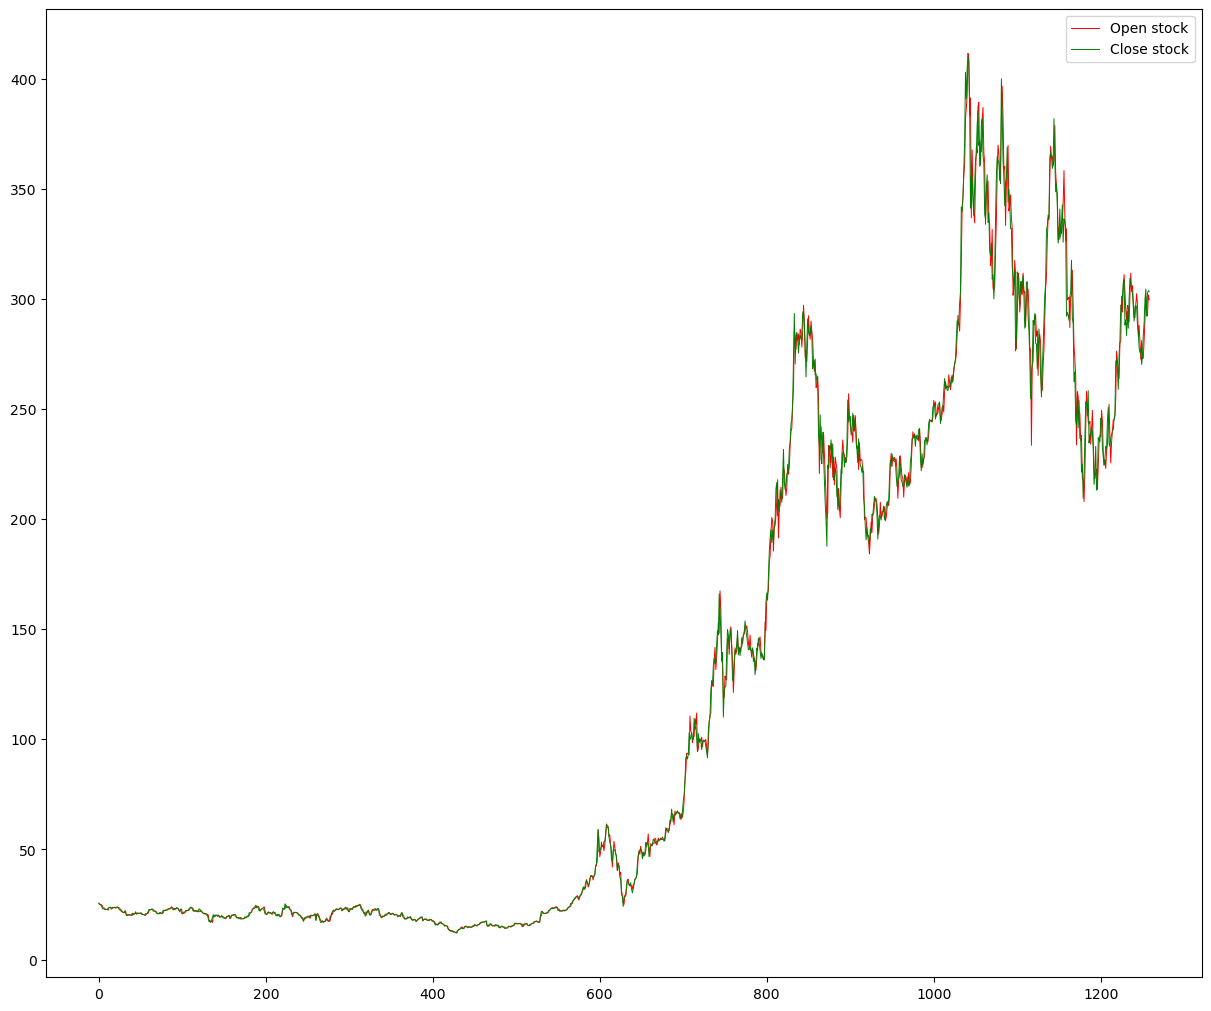

In [583]:
color =['red','green']
stock=["Open","Close",]
plt.figure(figsize=(12, 10), constrained_layout=True)
for i, j in zip(color,stock):
    plt.plot(data[j], color=i , label=f'{j} stock',linewidth=0.7) 
    plt.legend()   
plt.show()

In [556]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [585]:
data.drop("Volume",axis=1,inplace=True)

In [588]:
data.rename(columns={'Date':"ds",'Adj Close':'y'})

,ds,Open,High,Low,Close,y
0,2017-09-18,25.350000,25.974001,25.178667,25.666668,25.666668
1,2017-09-19,25.333332,25.492666,24.904667,25.006666,25.006666
2,2017-09-20,24.866667,25.216667,24.738001,24.927334,24.927334
3,2017-09-21,24.993334,25.122000,24.300667,24.431999,24.431999
4,2017-09-22,24.432667,24.660000,23.392000,23.406000,23.406000
...,...,...,...,...,...,...
1254,2022-09-12,300.720001,305.489990,300.399994,304.420013,304.420013
1255,2022-09-13,292.899994,297.399994,290.399994,292.130005,292.130005
1256,2022-09-14,292.239990,306.000000,291.640015,302.609985,302.609985
1257,2022-09-15,301.829987,309.119995,300.720001,303.750000,303.750000


In [589]:
tasl_model=Prophet()

In [590]:
tasl_model.add_regressor("Open")
tasl_model.add_regressor("High")
tasl_model.add_regressor("Low")
tasl_model.add_regressor("Close")


In [ ]:
tesla_future=tasl_model.construct_holiday_dataframe()